In [2]:
import warnings              # import warnings first
warnings.filterwarnings('ignore')  # now you can use it

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
df = pd.read_csv(r'./data/stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
## checking missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
## checking duplicates
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
## define numeric and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
## print columns
print('we have {} numerical features : {} and {} categorical features : {}'.format(len(numerical_features), numerical_features, len(categorical_features), categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score'] and 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
## adding columns for total and average score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()  
math_full = df[df['math_score'] == 100]['average_score'].count()
print('Number of students with full score in reading : {}, writing : {}, math : {}'.format(reading_full, writing_full, math_full))    

Number of students with full score in reading : 17, writing : 14, math : 7


In [19]:
reading_less_20 = df[df['reading_score'] < 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] < 20]['average_score'].count()  
math_less_20 = df[df['math_score'] < 20]['average_score'].count()
print('Number of students with less than 20 score in reading : {}, writing : {}, math : {}'.format(reading_less_20, writing_less_20, math_less_20))

Number of students with less than 20 score in reading : 1, writing : 3, math : 4


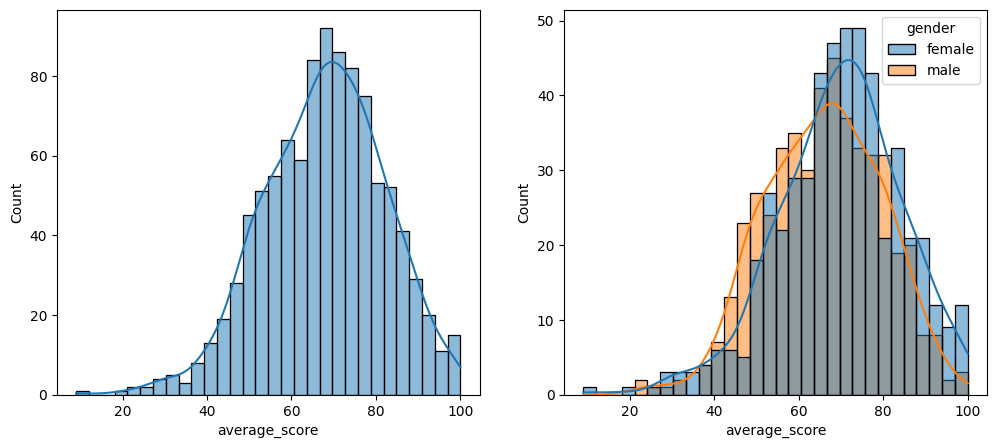

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average_score', kde=True, bins=30)
plt.subplot(1,2,2)
sns.histplot(data=df,x='average_score', kde=True, bins=30,hue='gender')
plt.show()

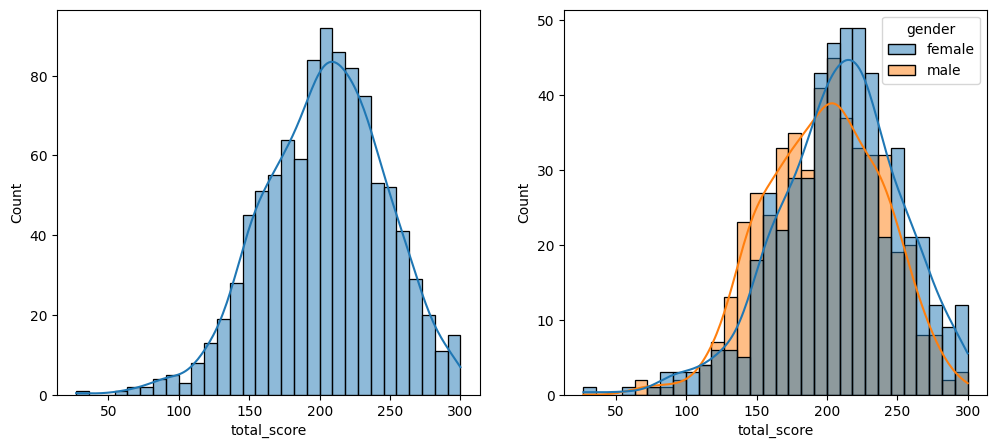

In [26]:
ig, axes = plt.subplots(1, 2, figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score', kde=True, bins=30)
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score', kde=True, bins=30,hue='gender')
plt.show()

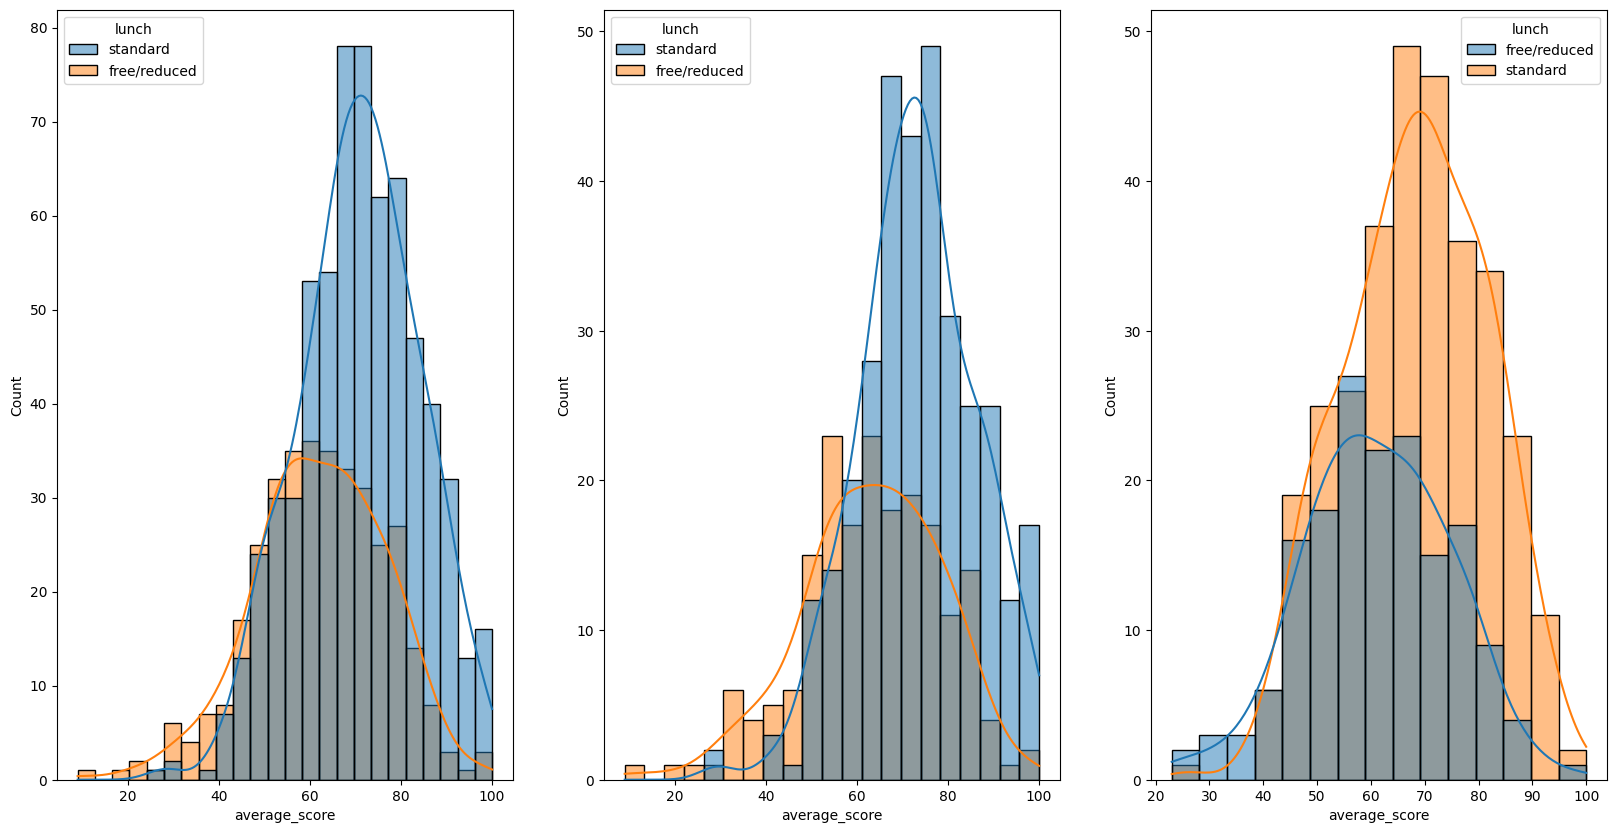

In [35]:
plt.subplots(1,3,figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=="female"],x='average_score',kde=True,hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=="male"],x='average_score',kde=True,hue='lunch')
plt.show()


In [29]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
